# Проект HR - аналитика #

# 1. Описание проекта

Аналитики помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Первая задача — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

## Импорт библиотек и изчение данных ##

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, make_scorer
!pip install phik -q
import phik
from phik.report import plot_correlation_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
!pip install --upgrade scikit-learn 1.3.1
!pip install --upgrade pip
!pip install shap -q
import warnings
warnings.filterwarnings("ignore")



ERROR: Could not find a version that satisfies the requirement 1.3.1 (from versions: none)
ERROR: No matching distribution found for 1.3.1
     |████████████████████████████████| 1.8 MB 959 kB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
    matplotlib-inline (<0.2.0appnope,>=0.1.0) ; platform_system == "Darwin"
                      ~~~~~~~~^


In [ ]:
train_job_satisfaction_rate.head()    
                                    

In [3]:
train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [4]:
try:
    test_features = pd.read_csv('datasets/test_features.csv')
except:
    test_features = pd.read_csv('/datasets/test_features.csv')
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [5]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [6]:
try:
    test_target_job_satisfaction_rate = pd.read_csv('datasets/test_target_job_satisfaction_rate.csv')
except:
    test_target_job_satisfaction_rate = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')


In [7]:
test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


# 2 Предобработка данных

**Посмотрим на уникальные значения каждого столбца**

In [8]:
train_job_satisfaction_rate['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [9]:
train_job_satisfaction_rate['level'].unique() # посмотрим уникальные значения столбца 'level'

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [10]:
train_job_satisfaction_rate['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [11]:
train_job_satisfaction_rate['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [12]:
train_job_satisfaction_rate['employment_years'].unique()

array([ 2,  1,  4,  7,  9,  6,  3, 10,  8,  5])

In [13]:
train_job_satisfaction_rate['last_year_promo'].unique()   

array(['no', 'yes'], dtype=object)

In [14]:
train_job_satisfaction_rate['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
train_job_satisfaction_rate['supervisor_evaluation'].unique()

array([1, 5, 2, 3, 4])

In [16]:
train_job_satisfaction_rate['salary'].unique()

array([24000, 38400, 12000, 18000, 22800, 30000, 56400, 52800, 13200,
       54000, 19200, 40800, 34800, 27600, 26400, 33600, 50400, 15600,
       14400, 25200, 72000, 31200, 32400, 48000, 43200, 46800, 58800,
       84000, 44400, 39600, 37200, 21600, 28800, 62400, 60000, 42000,
       49200, 55200, 57600, 68400, 45600, 51600, 64800, 80400, 20400,
       61200, 76800, 69600, 16800, 36000, 63600, 81600, 66000, 74400,
       67200, 70800, 73200, 75600, 79200, 94800, 78000, 88800, 92400,
       85200, 91200, 98400, 96000, 97200])

In [17]:
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [18]:
test_features['dept'] = test_features['dept'].replace(' ', np.nan)
test_features
# заменим пробелы на значение np.nan

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


In [19]:
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan],
      dtype=object)

In [20]:
train_job_satisfaction_rate['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [21]:
test_features['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [22]:
test_features['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [23]:
test_features['workload'] = test_features['workload'].replace(' ', np.nan) # тоже самое проделаем с данным столбцом

In [24]:
train_job_satisfaction_rate['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [25]:
test_features['employment_years'].unique()

array([ 2,  1,  5,  6,  3,  9,  7,  4,  8, 10])

In [26]:
test_features['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
test_features['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
test_features['supervisor_evaluation'].unique()

array([5, 4, 3, 1, 2])

In [29]:
test_features['salary'].unique()

array([28800, 30000, 19200, 40800, 42000, 26400, 49200, 62400, 14400,
       36000, 33600, 44400, 27600, 12000, 64800, 20400, 34800, 15600,
       18000, 50400, 31200, 51600, 16800, 43200, 52800, 32400, 37200,
       58800, 24000, 21600, 48000, 45600, 25200, 63600, 61200, 56400,
       38400, 46800, 55200, 13200, 39600, 54000, 57600, 68400, 22800,
       72000, 81600, 60000, 66000, 67200, 70800, 76800, 79200, 69600,
       94800, 82800, 80400, 87600, 86400, 96000, 78000, 75600, 73200,
       84000, 88800, 92400])

In [30]:
test_features.shape

(2000, 9)

**Предварительно можно сказать, что названия колонок всех таблиц имеют нормальный вид. Все названия колонок в змеином регистре и в строчном формате. Есть небольшое количество пропусков во второй и третьей таблицах. Грубых ошибок нет.**

**Посмотрим на пропуски и дубликаты**

In [31]:
train_job_satisfaction_rate.duplicated().sum()

0

In [32]:
train_job_satisfaction_rate.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [33]:
test_features.duplicated().sum()

0

In [34]:
test_features.isna().sum()

id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

**Дубликатов нет. Есть пропуски в столбцах 'dept' и 'level'. Удалим их в пайплайне**

# 3 Исследовательский анализ данных #

**Проведем исследователький анализ данных каждой таблицы**

In [35]:
train_job_satisfaction_rate.describe() # посмотрим на стаистику количественных переменных с помощью метода describe().

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


**С первого взгляда аномалий и выбросов не заметно. Построим графики для количественных переменных для наглядности**

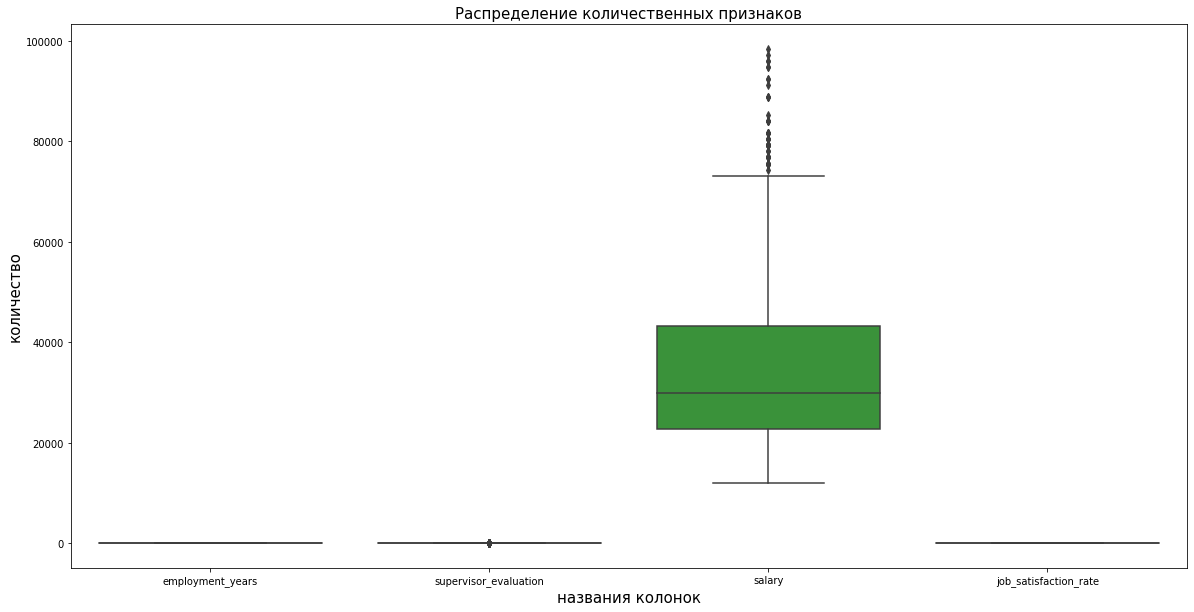

In [36]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_job_satisfaction_rate.drop(['id'], axis=1))
plt.title('Распределение количественных признаков', fontsize=15)
plt.xlabel('названия колонок', fontsize=15)
plt.ylabel('количество', fontsize=15)
plt.show();

**На таком графике видно только рспределение зарплаты. построим грфики отдельно для каждой колонки**

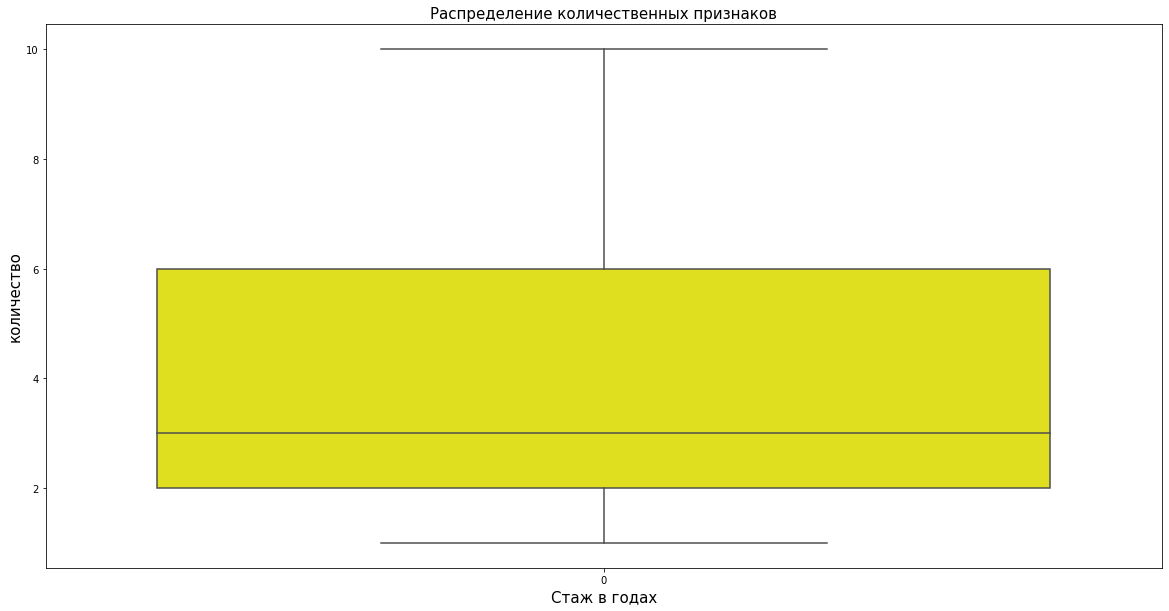

In [37]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_job_satisfaction_rate['employment_years'], color='yellow')
plt.title('Распределение количественных признаков', fontsize=15)
plt.xlabel('Стаж в годах', fontsize=15)
plt.ylabel('количество', fontsize=15)
plt.show();

**Выбросов и аноммалий нет, разброс стажа от 2 до 6 лет. Средний стаж 4 года**

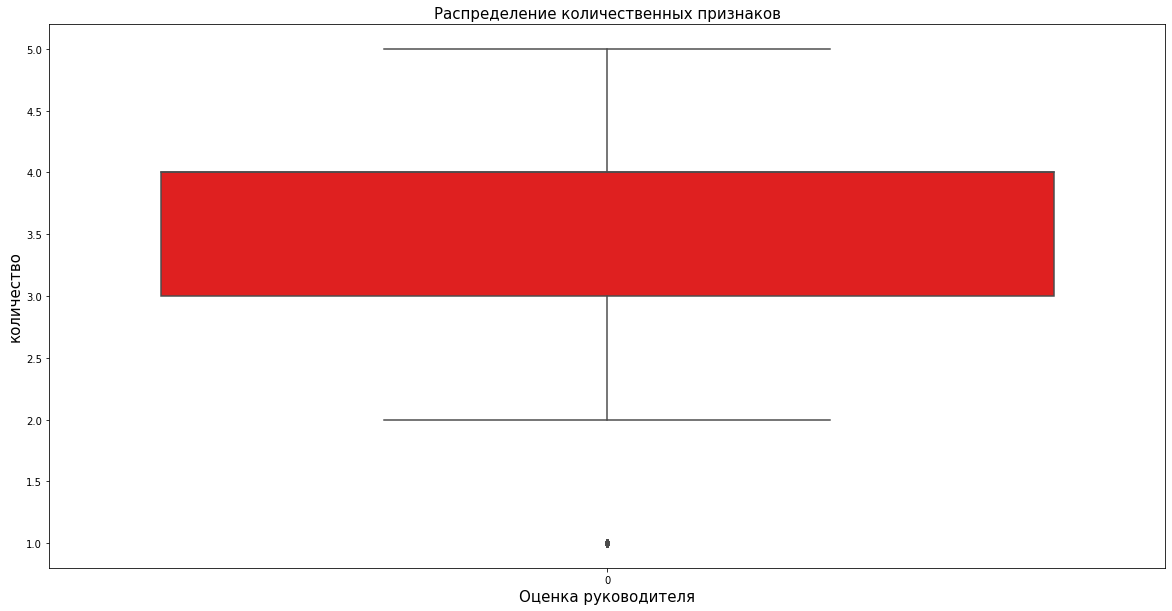

In [38]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_job_satisfaction_rate['supervisor_evaluation'], color='red')
plt.title('Распределение количественных признаков', fontsize=15)
plt.xlabel('Оценка руководителя', fontsize=15)
plt.ylabel('количество', fontsize=15)
plt.show();

**Оценка руководителя в основном от 3 до 4 баллов. Среднее 3.5. Есть выброс со значением 1**

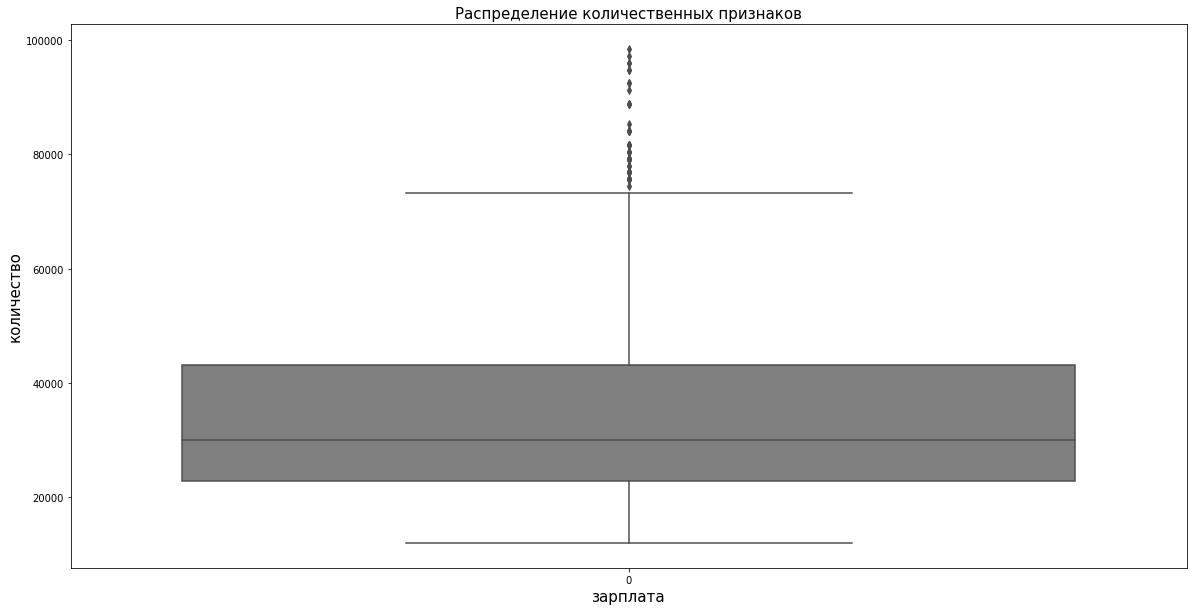

In [39]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_job_satisfaction_rate['salary'], color='grey')
plt.title('Распределение количественных признаков', fontsize=15)
plt.xlabel('зарплата', fontsize=15)
plt.ylabel('количество', fontsize=15)
plt.show();

**Остались вопросы по зарплате и оценке руководителя**

**Построим графики для категориальных переменных. Будем использовать круговые диаграммы**

array([<AxesSubplot:>], dtype=object)

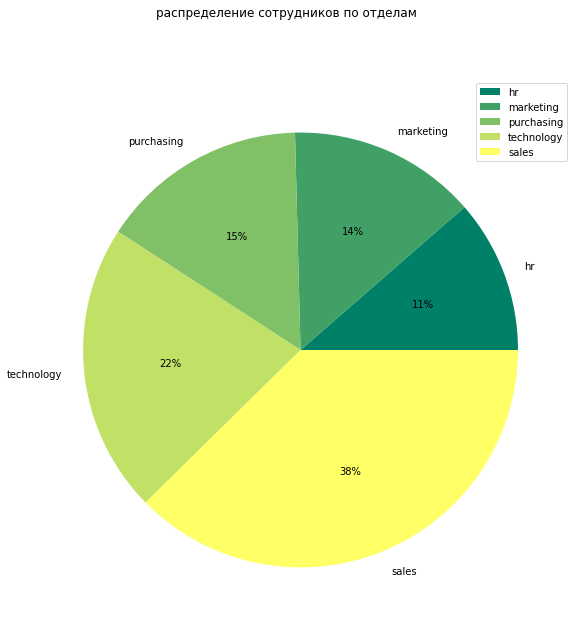

In [40]:
train_job_satisfaction_rate.groupby('dept')['id'].sum().sort_values().plot(kind='pie', figsize=(16, 10), cmap='summer', subplots=True, label='', legend=True, autopct='%1.0f%%', title='распределение сотрудников по отделам')

**Больше всего сотрудников работает в отделе продаж(38%), далее отдел технолгий(22%), далее отдел закупа(15%) и отдел рекламы(14%) и hr отдел(11%).**

array([<AxesSubplot:>], dtype=object)

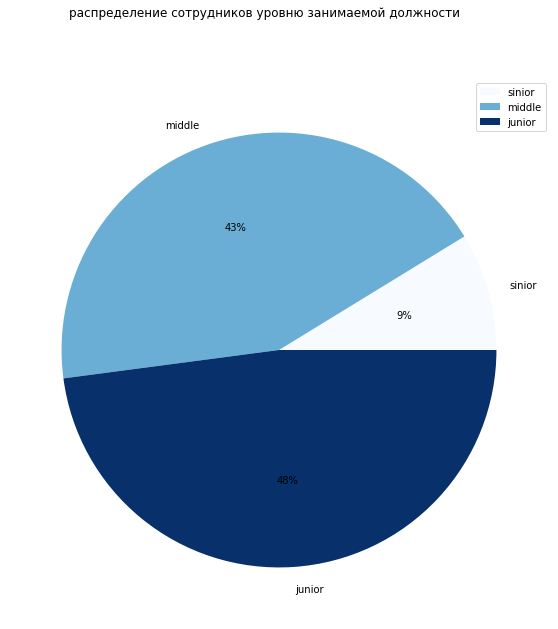

In [41]:
train_job_satisfaction_rate.groupby('level')['id'].sum().sort_values().plot(kind='pie', figsize=(16, 10), cmap='Blues', subplots=True, label='', legend=True, autopct='%1.0f%%', title='распределение сотрудников уровню занимаемой должности')

**middle-50%, senjor=44%, junior=7%**

array([<AxesSubplot:>], dtype=object)

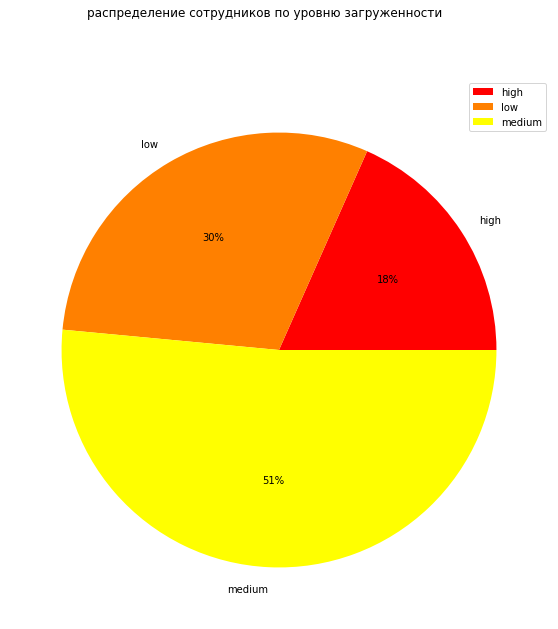

In [42]:
train_job_satisfaction_rate.groupby('workload')['id'].sum().sort_values().plot(
    kind='pie', figsize=(16, 10), 
    cmap='autumn', subplots=True, 
    label='', legend=True, 
    autopct='%1.0f%%', 
    title='распределение сотрудников по уровню загруженности')

array([<AxesSubplot:>], dtype=object)

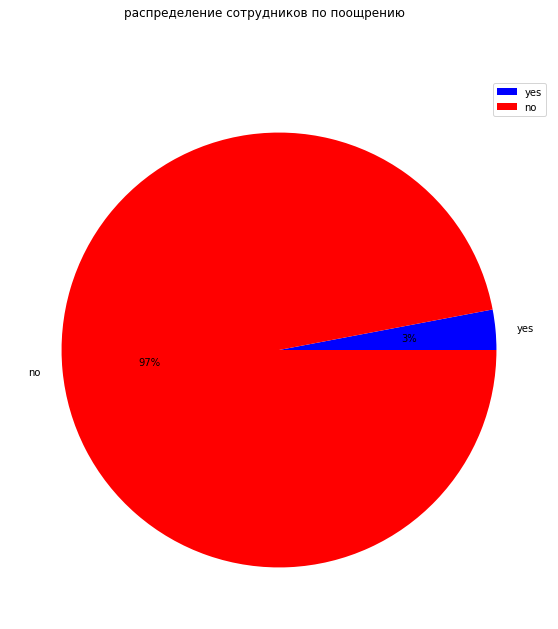

In [43]:
train_job_satisfaction_rate.groupby('last_year_promo')['id'].sum().sort_values().plot(
    kind='pie', figsize=(16, 10),
    cmap='bwr', subplots=True,
    label='', legend=True,
    autopct='%1.0f%%',
    title='распределение сотрудников по поощрению')

**Тут видим, что поощряли только 3% сотрудников за последний год**

array([<AxesSubplot:>], dtype=object)

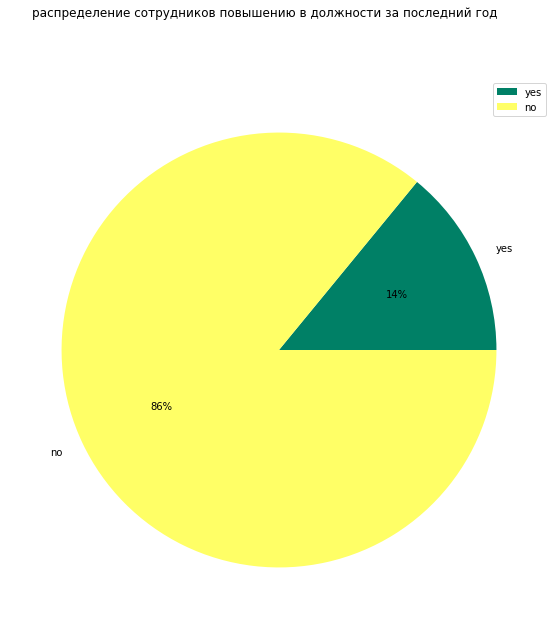

In [44]:
train_job_satisfaction_rate.groupby('last_year_violations')['id'].sum().sort_values().plot(
    kind='pie', figsize=(16, 10),
    cmap='summer', subplots=True,
    label='', legend=True,
    autopct='%1.0f%%',
    title='распределение сотрудников повышению в должности за последний год')

In [45]:
train_job_satisfaction_rate

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
...,...,...,...,...,...,...,...,...,...,...
3995,457950,technology,junior,high,2,no,no,3,46800,0.45
3996,957499,sales,junior,medium,2,no,no,4,21600,0.68
3997,533318,sales,middle,low,7,no,no,5,24000,0.76
3998,706868,sales,junior,medium,2,no,no,3,24000,0.48


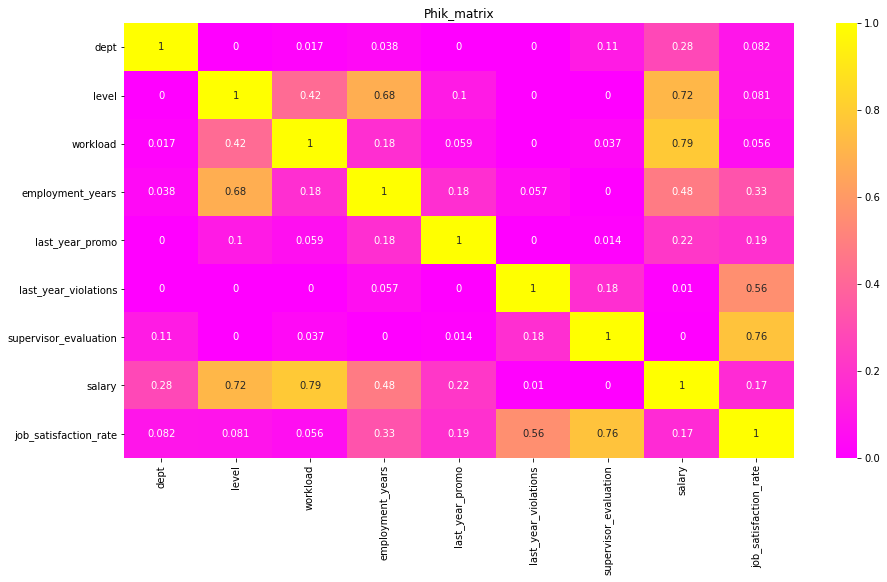

In [46]:
corr_matrix = train_job_satisfaction_rate.drop(['id'], axis=1).phik_matrix(
    interval_cols = ['salary', 'job_satisfaction_rate'])
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='spring')
plt.title('Phik_matrix')
plt.show()

**Сильная корреляция считается при значениях коэффииентов - 0.7-0.8. Заметна мультиколлинеарноть между зарплатой и уровню загруженности(0.79), также между зарплатой и уровнем должности(0.72). Также заметная связь между уровнем удовлетворенноти работой и оценкой руководителя(0.73)**

**Исследуем аналогично тестовую выборку**

In [47]:
test_features.describe()

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


**Разброс значений минимальных, максимальных и средних аналогичный, что и в тренирововной выборке**

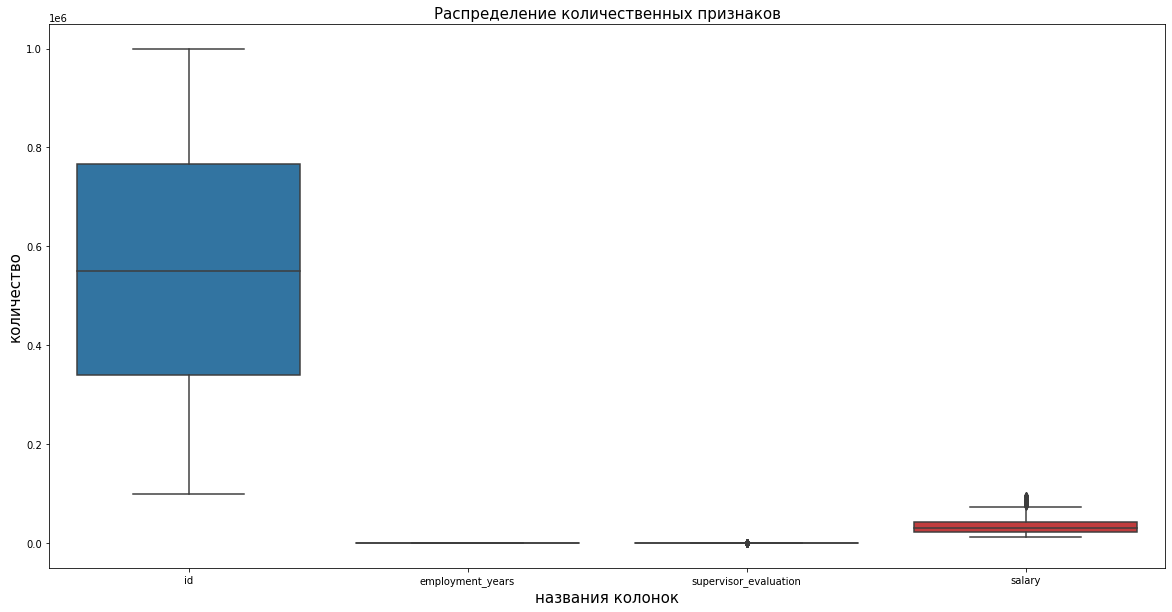

In [48]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=test_features)
plt.title('Распределение количественных признаков', fontsize=15)
plt.xlabel('названия колонок', fontsize=15)
plt.ylabel('количество', fontsize=15)
plt.show();

**Видно, что по зарплате и оценке руковоителя есть выбросы также как и в тренировоной выборке. Значит модель будет работать корректно**

**Построим матрицу корреляции по всем входным признакам, кроме дискретных**

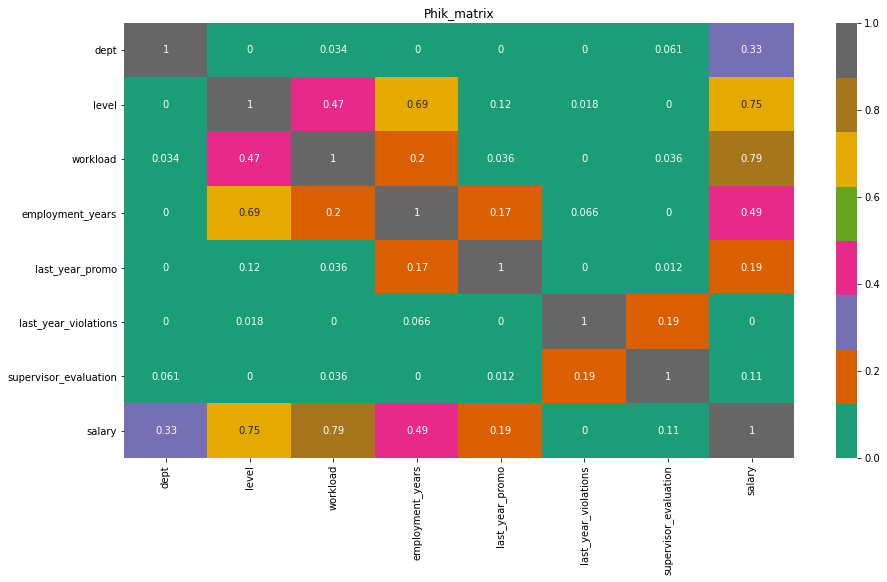

In [49]:
corr_matrix = test_features.drop(['id'], axis=1).phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Dark2')
plt.title('Phik_matrix')
plt.show()


**Тут также видна мультиколлиреарность как и в тренировочной выборке**

## 4 Подготовка данных ##

### Создание пайплайнов ##

**Создадим необходимые пайплайны и заполним пропуски с помощью SimpleImputer**

In [50]:
test_features =  test_features.merge(test_target_job_satisfaction_rate, on='id')
test_features

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64
3,418655,sales,middle,low,6,no,no,4,19200,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,0.75
...,...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400,0.56
1996,109582,technology,middle,low,3,no,no,2,21600,0.14
1997,305653,technology,junior,low,1,no,no,3,14400,0.11
1998,160233,technology,middle,low,8,no,no,1,32400,0.43


In [51]:
RANDOM_STATE = 42
TEST_SIZE=0.25

X_train = train_job_satisfaction_rate.drop(['id', 'job_satisfaction_rate'], axis=1)
y_train = train_job_satisfaction_rate['job_satisfaction_rate']
X_test = test_features.drop(['id', 'job_satisfaction_rate'], axis=1)
y_test = test_features['job_satisfaction_rate']




In [52]:
X_train['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [53]:
X_test['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan],
      dtype=object)

In [54]:
param_grid = [
     {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 6),
        'models__max_features': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
     },
     {
        'models': [KNeighborsRegressor()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
     },
     
]

In [55]:

num_columns = ['employment_years', 'salary', 'supervisor_evaluation']
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']

In [56]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(handle_unknown='ignore')
        )
    ]
)

In [57]:
ohe_pipe

Pipeline(steps=[('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [58]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['medium', 'low', 'high'] 
                ],
                handle_unknown = 'use_encoded_value',
                unknown_value = np.nan
                
            )
        ),       
        (
           'simpleImputer_after_ord', 
           SimpleImputer(missing_values=np.nan, strategy='most_frequent')      
        )
    ]
)

In [59]:
ord_pipe

Pipeline(steps=[('simpleImputer_before_ord',
                 SimpleImputer(strategy='most_frequent')),
                ('ord',
                 OrdinalEncoder(categories=[['junior', 'middle', 'sinior'],
                                            ['medium', 'low', 'high']],
                                handle_unknown='use_encoded_value',
                                unknown_value=nan)),
                ('simpleImputer_after_ord',
                 SimpleImputer(strategy='most_frequent'))])

In [60]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
) 

In [61]:
data_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['dept', 'last_year_promo',
                                  'last_year_violations']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['junior',
                                                                              'middle',
                                                                              'sinior'],
                                                                             ['medium',
                                                                              'low',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan)),
                                                 ('simpleImputer_after_ord',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['level', 'workload']),
                                ('num', StandardScaler(),
                                 ['employment_years', 'salary',
                                  'supervisor_evaluation'])])

In [62]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state = RANDOM_STATE))
    ]
)
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='mo...
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'sinior'],
                                                                                              ['medium',
                                                                                               'low',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years', 'salary',
                                                   'supervisor_evaluation'])])),
                ('models', DecisionTreeRegressor(random_state=42))])

**В качестве первой модели возьмем дерево решений  DecisionTreeRegression для задачи регрессии. В качестве второй возьмем модель линейной регрессии LinearRegression. Далее на основе заданных гиперпараметров найдем лучшую модель с помощью GridSearchCV.**

**Напишем функцию для вычисления метрики Smape**

In [63]:
def smape(y_test, y_pred ):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))

In [64]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [65]:
param_grid = [
     {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 6),
        'models__max_features': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
     },
     {
        'models': [KNeighborsRegressor()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
     },
     {
         'models': [LinearRegression()],
         'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
     }
]

# 5 Обучение модели

In [66]:
grid_search = GridSearchCV(pipe_final,
                   param_grid,
                   cv=5,
                   scoring=smape_scorer,
                    n_jobs=-1)
grid_search.fit(X_train, y_train)
y_pred1 = grid_search.predict(X_test)

print(f'Лучшая модель\n\n: {grid_search.best_estimator_}')
print(f'лучшая метрика  модели: {grid_search.best_score_:.3f}')
print(f'Лушая метрика на тестовой выборке: {smape(y_test, y_pred1)}')

Лучшая модель

: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='mo...
                                                

## 6 Оформление выводов ##

**Лучшая модель - KNeighborsRegressor с параметром n_neighbors=3, лучшая метрика модели равна -16,869, smape=15.453, что означает, что на тестовой выборке модель работает чуть хуже, чем на тренировочной, что подпадает под Критерий успеха: SMAPE ≤ 15 на тестовой выборке.**

In [67]:
y_pred1

array([0.86666667, 0.69333333, 0.67      , ..., 0.19      , 0.44333333,
       0.53      ])

**Мы выполнили первую задачу - нашли и обучили лучшую модель, которая предсказывает уровень удовлетворенности работой сотрудника. Это модель KNN с гиперпараметром n_neighbors=3. Также мы посчитали лучшую метрику модели на тренировоной выборке , она равна -16,869, метрика smape на тестовой выборке=15.453, что соответствует заданному критерию и что означает, что модель работает хорошо как на тренировоных так и на тестовых данных.**

# Задача 2 #

# 1 Загрузка данных

In [68]:
try:
    train_quit = pd.read_csv('datasets/train_quit.csv')
except:
    train_quit = pd.read_csv('/datasets/train_quit.csv')
train_quit.head()


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [69]:
train_quit['job_satisfaction_rate_new'] = train_job_satisfaction_rate[
    'job_satisfaction_rate'
]
train_quit

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate_new
0,723290,sales,middle,high,2,no,no,4,54000,no,0.58
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.76
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.11
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.37
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.20
...,...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no,0.45
3996,672059,sales,middle,high,9,no,no,4,52800,no,0.68
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes,0.76
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no,0.48


In [70]:
for i in range(len(test_features['job_satisfaction_rate'])):
    test_features['i', 'job_satisfaction_rate'] = y_pred1[i]
    
print(test_features.sort_values(by='job_satisfaction_rate', ascending=False))

          id        dept   level workload  employment_years last_year_promo  \
380   595409  technology  middle     high                 6             yes   
55    165557       sales  sinior   medium                 9             yes   
630   494074   marketing  sinior   medium                 9             yes   
181   722804       sales  middle     high                 5             yes   
1483  757913       sales  sinior     high                10             yes   
...      ...         ...     ...      ...               ...             ...   
67    389687       sales  sinior     high                 2              no   
439   906749  purchasing  junior   medium                 1              no   
1387  650238  technology  middle   medium                 1              no   
1356  646071  purchasing  middle      low                 3              no   
115   793330       sales  middle   medium                 1              no   

     last_year_violations  supervisor_evaluation  s

In [71]:
try:
    test_target_quit = pd.read_csv('dataseets/test_target_quit.csv')
except:
    test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')
test_target_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [72]:
test_features

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,"(i, job_satisfaction_rate)"
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79,0.53
1,686555,hr,junior,medium,1,no,no,4,30000,0.72,0.53
2,467458,sales,middle,low,5,no,no,4,19200,0.64,0.53
3,418655,sales,middle,low,6,no,no,4,19200,0.60,0.53
4,789145,hr,middle,medium,5,no,no,5,40800,0.75,0.53
...,...,...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400,0.56,0.53
1996,109582,technology,middle,low,3,no,no,2,21600,0.14,0.53
1997,305653,technology,junior,low,1,no,no,3,14400,0.11,0.53
1998,160233,technology,middle,low,8,no,no,1,32400,0.43,0.53


In [73]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         4000 non-null   int64  
 1   dept                       4000 non-null   object 
 2   level                      4000 non-null   object 
 3   workload                   4000 non-null   object 
 4   employment_years           4000 non-null   int64  
 5   last_year_promo            4000 non-null   object 
 6   last_year_violations       4000 non-null   object 
 7   supervisor_evaluation      4000 non-null   int64  
 8   salary                     4000 non-null   int64  
 9   quit                       4000 non-null   object 
 10  job_satisfaction_rate_new  4000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 343.9+ KB


# 2 Предобработка данных #

In [74]:
train_quit.isna().sum()

id                           0
dept                         0
level                        0
workload                     0
employment_years             0
last_year_promo              0
last_year_violations         0
supervisor_evaluation        0
salary                       0
quit                         0
job_satisfaction_rate_new    0
dtype: int64

In [75]:
train_quit.duplicated().sum()

0

**Пропусков и дубликатов нет**

# 3 Исследовательский анализ данных

**Проведем исследовательский анализ данных**

In [76]:
def check_columns(train_quit):
    for column in train_quit.columns:
        print(f'Уникальные значения столбца: {column}')
        print(train_quit[column].unique())


In [77]:
check_columns(train_quit)

Уникальные значения столбца: id
[723290 814010 155091 ... 536432 692133 853842]
Уникальные значения столбца: dept
['sales' 'purchasing' 'marketing' 'technology' 'hr']
Уникальные значения столбца: level
['middle' 'junior' 'sinior']
Уникальные значения столбца: workload
['high' 'medium' 'low']
Уникальные значения столбца: employment_years
[ 2  5  1  8  4  7  3  9  6 10]
Уникальные значения столбца: last_year_promo
['no' 'yes']
Уникальные значения столбца: last_year_violations
['no' 'yes']
Уникальные значения столбца: supervisor_evaluation
[4 1 3 5 2]
Уникальные значения столбца: salary
[54000 27600 37200 24000 25200 18000 44400 19200 45600 57600 33600 16800
 22800 26400 82800 32400 39600 30000 46800 12000 15600 58800 60000 66000
 21600 38400 62400 40800 56400 34800 28800 52800 20400 36000 61200 48000
 43200 73200 31200 78000 64800 72000 94800 96000 63600 79200 55200 42000
 49200 50400 14400 13200 51600 67200 88800 68400 69600 70800 84000 81600
 87600 75600 91200 76800 74400 80400 85200 8

**На первый взгляд ошибок и пропусков нет. Посмотрим есть ли дубликаты и пропуски методами duplicated() и isna()**

In [78]:
train_quit.duplicated().sum() # Проверим заодно на явные дубликаты

0

In [79]:
train_quit.isna().sum()

id                           0
dept                         0
level                        0
workload                     0
employment_years             0
last_year_promo              0
last_year_violations         0
supervisor_evaluation        0
salary                       0
quit                         0
job_satisfaction_rate_new    0
dtype: int64

**Можно сделать промежуточный вывод, что пропусков и дубликатов нет**

**Построим графики для наглядности для количественных переменных и для категориальных и посмотрим на статистику методом describe()**

In [80]:
train_quit.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate_new
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000,0.533995
std,260158.031387,2.541852,1.004049,15152.415163,0.225327
min,100222.000000,1.000000,1.000000,12000.000000,0.030000
25%,327785.750000,2.000000,3.000000,22800.000000,0.360000
50%,546673.000000,3.000000,4.000000,30000.000000,0.560000
75%,781497.750000,6.000000,4.000000,43200.000000,0.710000
max,999915.000000,10.000000,5.000000,96000.000000,1.000000


In [81]:
num_columns = train_quit[['employment_years', 'supervisor_evaluation', 'salary']]

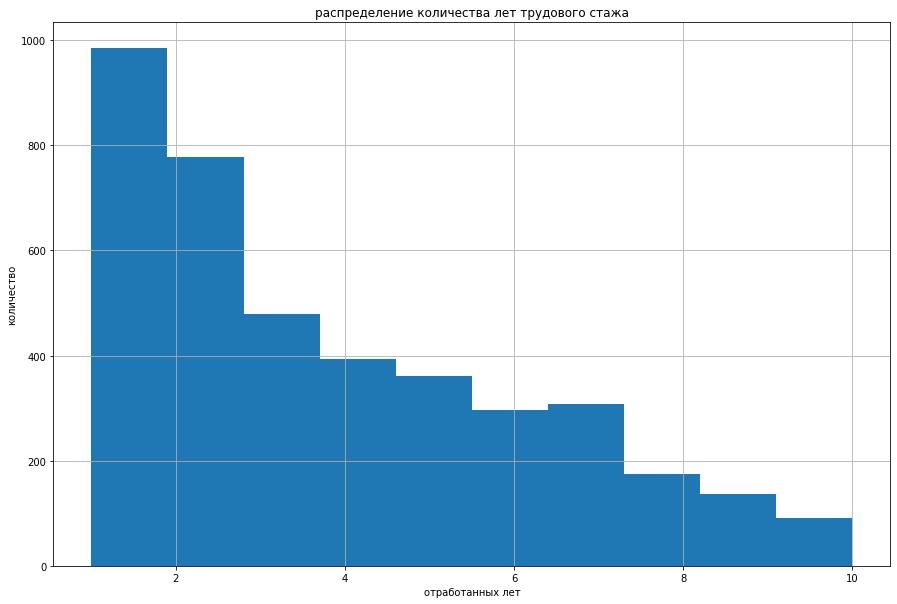

In [82]:
train_quit['employment_years'].hist(figsize=(15, 10))
plt.title('распределение количества лет трудового стажа')
plt.xlabel('отработанных лет')
plt.ylabel('количество')        
plt.show()                                   

**График без аномалий и выбросов и видна зависимость, чем больше трудовой стаж у сотрудников, тем меньше количество таких сотрудников**

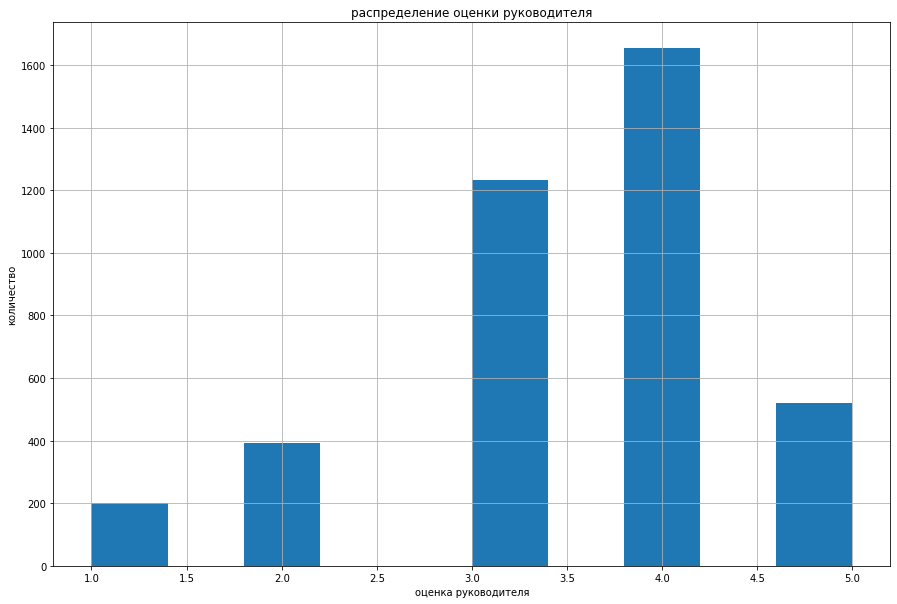

In [83]:
train_quit['supervisor_evaluation'].hist(figsize=(15, 10))
plt.title('распределение оценки руководителя')
plt.xlabel('оценка руководителя')
plt.ylabel('количество')        
plt.show()                                   

**Наибольшее количество сотрудников - с оценкй руководителя  диапазоне от 3 до 4**

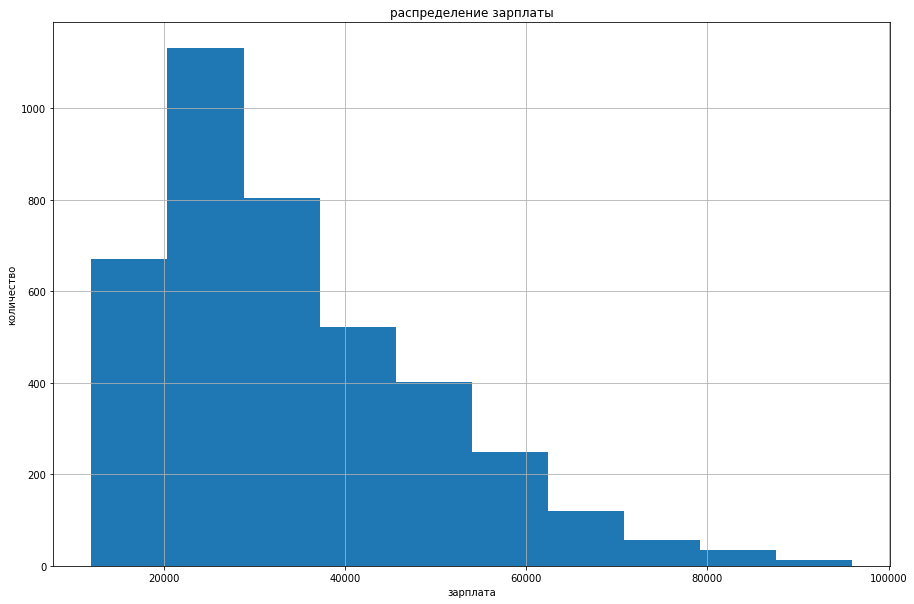

In [84]:
train_quit['salary'].hist(figsize=(15, 10))
plt.title('распределение зарплаты')
plt.xlabel('зарплата')
plt.ylabel('количество')        
plt.show() 

**Средняя зп 33805. Минмальная 12000. Максимальная 96000. Все, что выше 80000, считаю выбросами**

array([<AxesSubplot:>], dtype=object)

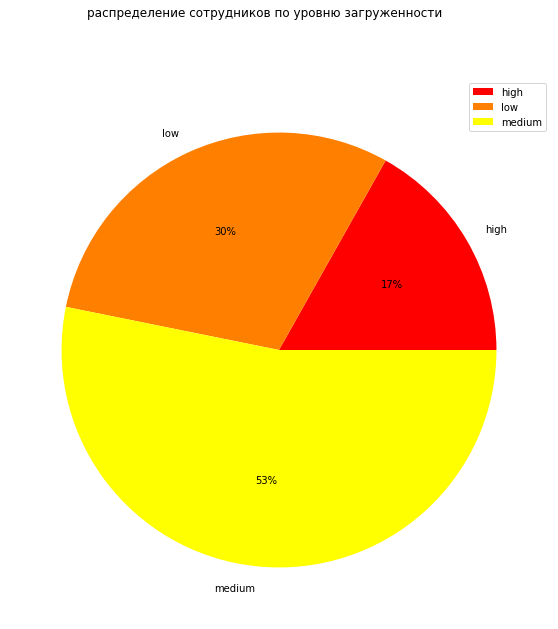

In [85]:
train_quit.groupby('workload')['id'].sum().sort_values().plot(
    kind='pie', figsize=(16, 10),
    cmap='autumn', subplots=True,
    label='', legend=True,
    autopct='%1.0f%%',
    title='распределение сотрудников по уровню загруженности')

<div class="alert alert-success">
<h2> Комментарий ревьюера 7 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

**Больше всего сотрудников со средней нарузкой**

array([<AxesSubplot:>], dtype=object)

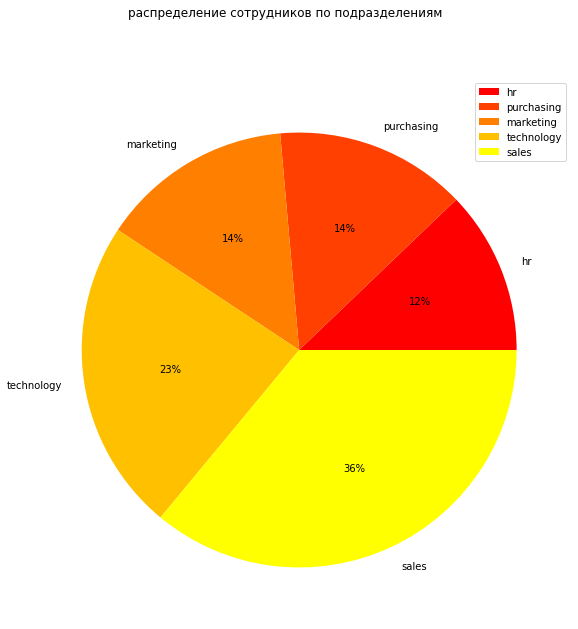

In [86]:
train_quit.groupby('dept')['id'].sum().sort_values().plot(
    kind='pie', figsize=(16, 10),
    cmap='autumn', subplots=True,
    label='', legend=True, 
    autopct='%1.0f%%',
    title='распределение сотрудников по подразделениям')

**Больше всего продажников и технологов в сравнении с предыдущей тренировочной выборкой, где ситуация была противоположная**

array([<AxesSubplot:>], dtype=object)

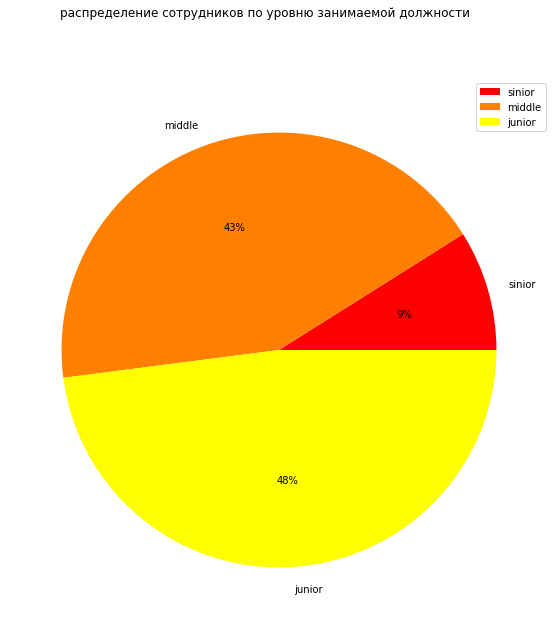

In [87]:
train_quit.groupby('level')['id'].sum().sort_values().plot(
    kind='pie', figsize=(16, 10),
    cmap='autumn', subplots=True,
    label='', legend=True,
    autopct='%1.0f%%',
    title='распределение сотрудников по уровню занимаемой должности')

**Мидлов меньше, чем junior на 5 процентов.По сравнению с предыдущим графиком по прошлой тренирвооной выборке, появилось много junior спецов - 48% против 0%**

array([<AxesSubplot:>], dtype=object)

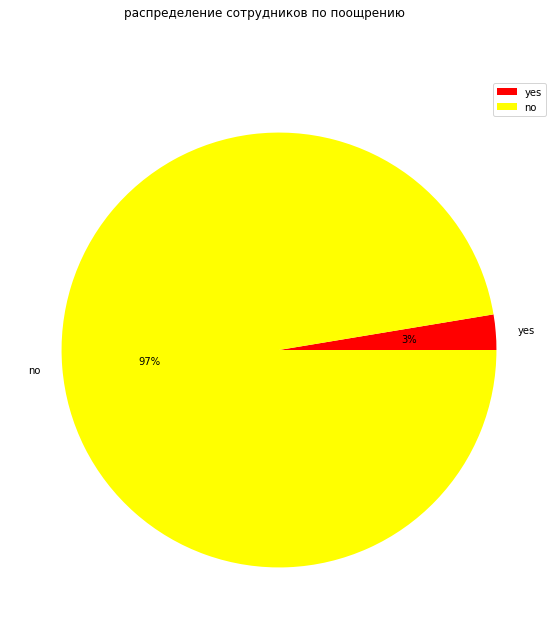

In [88]:
train_quit.groupby('last_year_promo')['id'].sum().sort_values().plot(
    kind='pie', figsize=(16, 10),
    cmap='autumn', subplots=True,
    label='', legend=True,
    autopct='%1.0f%%',
    title='распределение сотрудников по поощрению')

**Всего 3 процента среди тех, у кого было поощрение**

array([<AxesSubplot:>], dtype=object)

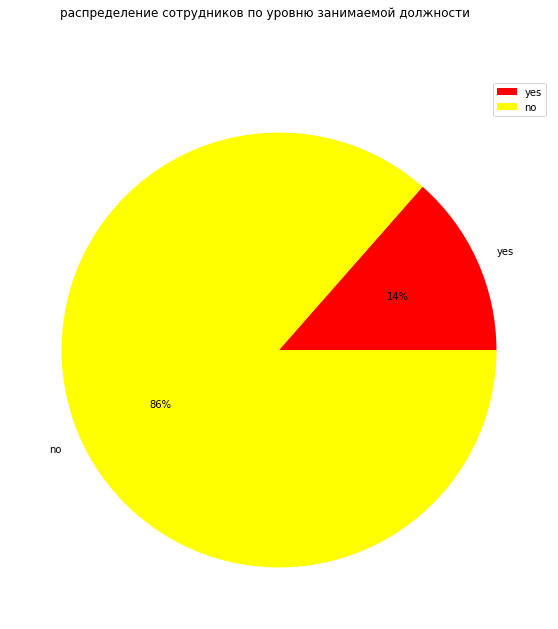

In [89]:
train_quit.groupby('last_year_violations')['id'].sum().sort_values().plot(
    kind='pie', figsize=(16, 10),
    cmap='autumn', subplots=True,
    label='', legend=True,
    autopct='%1.0f%%',
    title='распределение сотрудников по уровню занимаемой должности')

**У 14% всех сотрудников были предупреждения**

**Составим портрет уволившегося сотрудника. Для этого сгруппируем данные по отделам и посчитаем долю среди уволившихся**

In [90]:
retired = train_quit.groupby(['dept', 'quit'])['id'].count()
sum_dept = train_quit.groupby('dept')['id'].count()
print(sum_dept)
print(retired)



dept
hr             464
marketing      582
purchasing     588
sales         1438
technology     928
Name: id, dtype: int64
dept        quit
hr          no       348
            yes      116
marketing   no       419
            yes      163
purchasing  no       422
            yes      166
sales       no      1031
            yes      407
technology  no       652
            yes      276
Name: id, dtype: int64


In [91]:
retired = train_quit.groupby(['dept', 'quit'])['id'].count()
sum_dept = train_quit.groupby('dept')['id'].count()
print(sum_dept)
print(retired)
dolya_quit_hr = round(116 / 464, 2)
dolya_quit_marketing = round(163 / 582, 2)
dolya_quit_purchasing = round(166/588, 2)
dolya_quit_sales = round(407/1438, 2)
dolya_quit_technology = round(276/928, 2)
print(f'Доля ушедших из отдела "hr": {dolya_quit_hr}')
print(f'Доля ушедших из отдела "marketing": {dolya_quit_marketing}')
print(f'Доля ушедших из отдела "purchasing": {dolya_quit_purchasing}')
print(f'Доля ушедших из отдела "sales": {dolya_quit_sales}')
print(f'Доля ушедших из отдела "technology": {dolya_quit_technology}')









dept
hr             464
marketing      582
purchasing     588
sales         1438
technology     928
Name: id, dtype: int64
dept        quit
hr          no       348
            yes      116
marketing   no       419
            yes      163
purchasing  no       422
            yes      166
sales       no      1031
            yes      407
technology  no       652
            yes      276
Name: id, dtype: int64
Доля ушедших из отдела "hr": 0.25
Доля ушедших из отдела "marketing": 0.28
Доля ушедших из отдела "purchasing": 0.28
Доля ушедших из отдела "sales": 0.28
Доля ушедших из отдела "technology": 0.3


In [92]:
def dola_uhod(row):
    if row['dept'] == 'technology':
        return 0.3
    if row['dept'] == 'hr':
        return 0.25
    else:
        return 0.28
train_quit['dola_uhod'] = train_quit.apply(dola_uhod, axis=1)
print(dola_uhod)
    



<function dola_uhod at 0x7f56a02e3b80>


<AxesSubplot:xlabel='dola_uhod', ylabel='Density'>

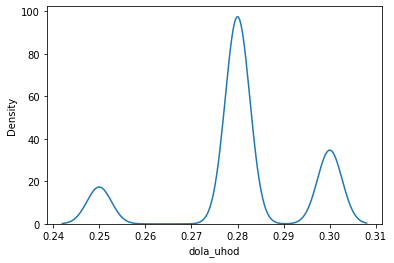

In [93]:
sns.kdeplot(data=test_target_quit['quit'], x=train_quit['dola_uhod'])

array([<AxesSubplot:>], dtype=object)

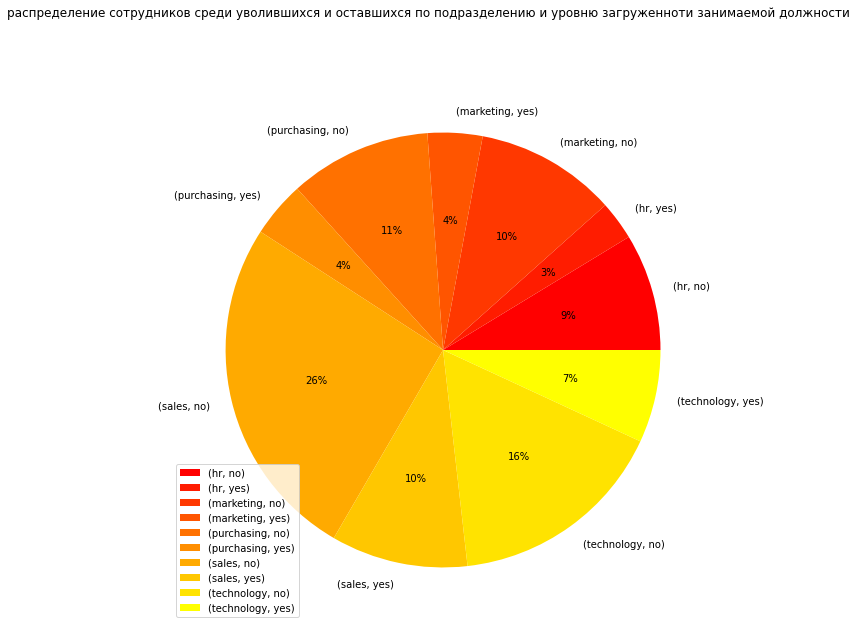

In [94]:
retired.plot(
kind='pie',
figsize=(16, 10),
cmap='autumn',
subplots=True,
label='',
legend=True,
autopct='%1.0f%%',
title=('распределение сотрудников среди уволившихся и оставшихся по подразделению и уровню загруженноти занимаемой должности'))


**Больше всего уволившихся сотрудников работает в отделе продаж и в отделе технологий с низкой и умеренной загруженностью.**

**Сравним зарплаты работающих и уволившихся сотруников**

In [95]:
salary_retired_employee = train_quit.groupby('quit')['salary'].agg('mean')
salary_retired_employee.reset_index()


,quit,salary
0,no,37702.228412
1,yes,23885.106383


**Итак видим, что средняя зарплата уволившихся сотрудников = 23885р, меньше средней зарплаты работающих сотрудников = 37702р. Отсюда можно сделать вывод, что зависимость увольнения сотрудника от зарпалты пристутствует**

array([<AxesSubplot:>], dtype=object)

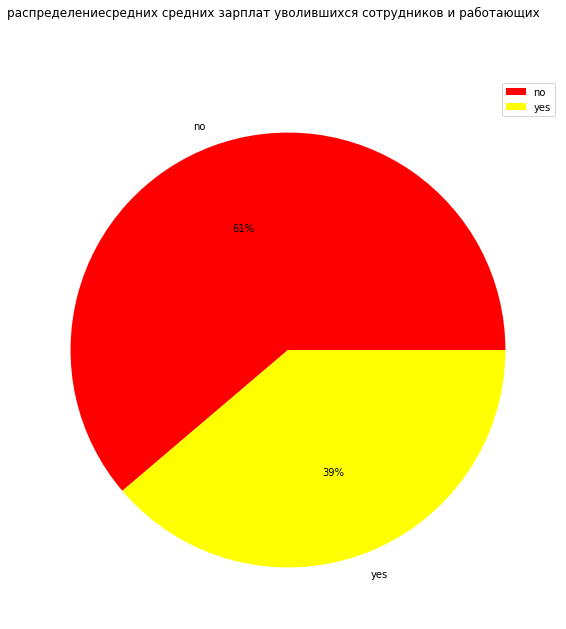

In [96]:
salary_retired_employee.plot(
    kind='pie',
    figsize=(16, 10),
    cmap='autumn',
    subplots=True,
    label='',
    autopct='%1.0f%%',
    legend=True, 
    title='распределениесредних средних зарплат уволившихся сотрудников и работающих')

**Построим матрицу корреляции по новой тренировочной выборке**

In [97]:
train_quit

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate_new,dola_uhod
0,723290,sales,middle,high,2,no,no,4,54000,no,0.58,0.28
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.76,0.28
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.11,0.28
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.37,0.28
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.20,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no,0.45,0.28
3996,672059,sales,middle,high,9,no,no,4,52800,no,0.68,0.28
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes,0.76,0.28
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no,0.48,0.28


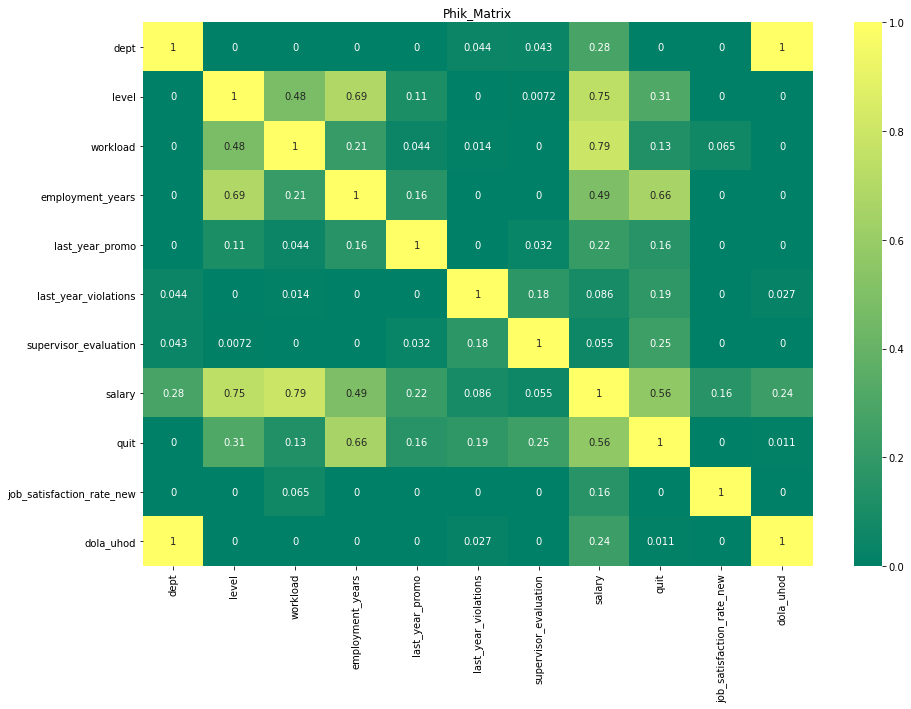

In [98]:
corr_matrix = train_quit.drop('id', axis=1).phik_matrix(interval_cols=['salary'])
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='summer')
plt.title('Phik_Matrix')
plt.show();

**По сравнению с предыдущими матрицами видимых изменений нет**

In [99]:
test_features = test_features.rename(columns={('i', 'job_satisfaction_rate'): 'job_satisfaction_rate_new'})
test_features

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,job_satisfaction_rate_new
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79,0.53
1,686555,hr,junior,medium,1,no,no,4,30000,0.72,0.53
2,467458,sales,middle,low,5,no,no,4,19200,0.64,0.53
3,418655,sales,middle,low,6,no,no,4,19200,0.60,0.53
4,789145,hr,middle,medium,5,no,no,5,40800,0.75,0.53
...,...,...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400,0.56,0.53
1996,109582,technology,middle,low,3,no,no,2,21600,0.14,0.53
1997,305653,technology,junior,low,1,no,no,3,14400,0.11,0.53
1998,160233,technology,middle,low,8,no,no,1,32400,0.43,0.53


**Можно сделать вывод, что количество сотрудников, одновременно удовлетворенных работой и уволившихся равно 89 человек, что меньше пачти в 10 раз по сравнению с теми, кто также удовлетворен работой, но остался работать. А это 752 человека. Это значит, что среди удовлетворенных сотруднков своей работой, больше тех, кто остался работать дальше**

array([<AxesSubplot:>], dtype=object)

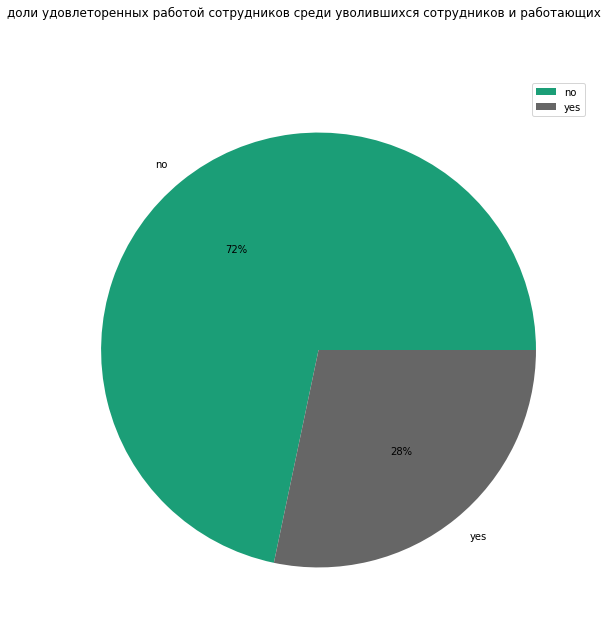

In [100]:
job_quit_plot = train_quit.groupby('quit')['job_satisfaction_rate_new'].sum().plot(
kind='pie',
    figsize=(16, 10),
    cmap='Dark2',
    subplots=True,
    label='',
    autopct='%1.0f%%',
    legend=True, 
    title=('доли удовлеторенных работой сотрудников среди уволившихся сотрудников и работающих')
)
job_quit_plot

**Доля удовлетворенных работников среди уволившихся равна 28% а доля удовлетворенных среди оставшихся 72%, что в целом обьективно. Те, кто увольняются, обычно не удовлетворены работой**

<AxesSubplot:xlabel='job_satisfaction_rate_new', ylabel='Density'>

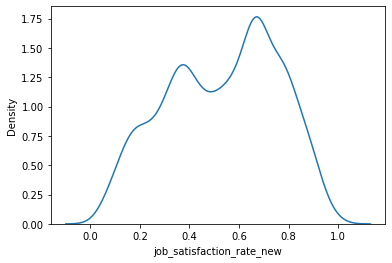

In [101]:
sns.kdeplot(data=train_quit['quit'], x=train_quit['job_satisfaction_rate_new'])

In [102]:
test_features

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,job_satisfaction_rate_new
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79,0.53
1,686555,hr,junior,medium,1,no,no,4,30000,0.72,0.53
2,467458,sales,middle,low,5,no,no,4,19200,0.64,0.53
3,418655,sales,middle,low,6,no,no,4,19200,0.60,0.53
4,789145,hr,middle,medium,5,no,no,5,40800,0.75,0.53
...,...,...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400,0.56,0.53
1996,109582,technology,middle,low,3,no,no,2,21600,0.14,0.53
1997,305653,technology,junior,low,1,no,no,3,14400,0.11,0.53
1998,160233,technology,middle,low,8,no,no,1,32400,0.43,0.53


In [103]:
le = LabelEncoder()
train_quit['quit'] = le.fit_transform(train_quit['quit'])
test_target_quit['quit'] = le.transform(test_target_quit['quit'])



## 4 Подготовка данных

**Разделим данные на тренировочные и тестовые, создадим пайплайн и найдем лучшую моедль с гиперпараметрами с помощью поиска по сетке grid_search**

In [104]:
test_size = 0.25
RANDOM_STATE = 42
X_train_new = train_quit.drop(['id', 'quit', 'dola_uhod'], axis=1)
y_train_new = train_quit['quit']
test_features = test_features.copy()
test_features = test_features.merge(test_target_quit, on='id')
X_test_new = test_features.drop(['id', 'quit', 'job_satisfaction_rate'], axis=1)
y_test_new = test_features['quit']



In [105]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
    'models__max_depth': range(2, 6),
    'models__max_features': range(2, 9),
    'preprocessor__num':  [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
          'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
]

In [106]:
num_columns = ['employment_years', 'salary', 'supervisor_evaluation', 'job_satisfaction_rate_new']
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']

In [107]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(handle_unknown='ignore')
        )
    ]
)

In [108]:
ohe_pipe

Pipeline(steps=[('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [109]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['medium', 'low', 'high'] 
                ],
                handle_unknown = 'use_encoded_value',
                unknown_value = np.nan
                
            )
        ),       
        (
           'simpleImputer_after_ord', 
           SimpleImputer(missing_values=np.nan, strategy='most_frequent')      
        )
    ]
)

In [110]:
ord_pipe

Pipeline(steps=[('simpleImputer_before_ord',
                 SimpleImputer(strategy='most_frequent')),
                ('ord',
                 OrdinalEncoder(categories=[['junior', 'middle', 'sinior'],
                                            ['medium', 'low', 'high']],
                                handle_unknown='use_encoded_value',
                                unknown_value=nan)),
                ('simpleImputer_after_ord',
                 SimpleImputer(strategy='most_frequent'))])

In [111]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
) 

In [112]:
data_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['dept', 'last_year_promo',
                                  'last_year_violations']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['junior',
                                                                              'middle',
                                                                              'sinior'],
                                                                             ['medium',
                                                                              'low',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=nan)),
                                                 ('simpleImputer_after_ord',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['level', 'workload']),
                                ('num', StandardScaler(),
                                 ['employment_years', 'salary',
                                  'supervisor_evaluation',
                                  'job_satisfaction_rate_new'])])

In [113]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state = RANDOM_STATE))
    ]
)
pipe_final.fit(X_train_new, y_train_new)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='mo...
                                                                                               'middle',
                                                                                               'sinior'],
                                                                                              ['medium',
                                                                                               'low',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years', 'salary',
                                                   'supervisor_evaluation',
                                                   'job_satisfaction_rate_new'])])),
                ('models', DecisionTreeClassifier(random_state=42))])

**Найдем лучшие гиперпараметры  помощью сетки GridSearchCV**

In [114]:
param_grid = [
     {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 6),
        'models__max_features': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
     },
     {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
     },
     {  'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
     }
]
        

In [115]:
grid_search = GridSearchCV(pipe_final,
                   param_grid,
                   cv=5,
                   scoring='roc_auc',
                    n_jobs=-1)
grid_search.fit(X_train_new, y_train_new)
y_pred2 = grid_search.predict_proba(X_test_new)[:,1]

print(f'Лучшая модель\n\n: {grid_search.best_estimator_}')
print(f'лучшая метрика  модели: {grid_search.best_score_:.3f}')
print(f'Лушая метрика на тестовой выборке: {roc_auc_score(y_test_new, y_pred2)}')

Лучшая модель

: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='mo...
                                                

## 5 Обучение модели ##

In [116]:
grid_search = GridSearchCV(pipe_final,
                   param_grid,
                   cv=5,
                   scoring='roc_auc',
                    n_jobs=-1)
grid_search.fit(X_train_new, y_train_new)
y_pred2 = grid_search.predict_proba(X_test_new)[:,1]

print(f'Лучшая модель\n\n: {grid_search.best_estimator_}')
print(f'лучшая метрика  модели: {grid_search.best_score_:.3f}')
print(f'Лушая метрика на тестовой выборке: {roc_auc_score(y_test_new, y_pred2)}')

Лучшая модель

: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='mo...
                                                

## 6 Оформление выводов ##

**Лучшая модель - дерево решений с параметрами max_depth=5, max_features=8, random_state=42. Метрика roc_auc на тестовой выборке соответствует  значению - 0.91, что соответствует критерию успеха roc_auc>=0.91**

**Мы выполнили задачу 2 - нашли и обучили лучшую модель, которая предсказывает увольнение сотрудника. Это модель DecisionTreClassifier с гиперпараметрами max_depth=5, max_features=8, random_state=42. Также мы посчитали метрику на тренировочной и тестовой выборке. Они практически одинаковые со значением около 0.91, что соответствует заданному критерию и что означает, что модель работает хорошо как на тренировоных так и на тестовых данных. Подводя итог, можно сказать, что обе задачи выполнены. в обоих задачах проведены последовательно все этапы - 1) Загрузка данных, 2) Предобработка данных 3) Исследовательский анализ данных, 4) Подготовка данных, 5) Обучение модели, 6) Оформление выводов.
Мы пришли к выводу, что обе модели в первой и второй задачах исследования, работают хорошо и их метрики соответствуют критериям успеха. Также мы построили портрет уволившегося сотрудника-это сотрудник, работающий в отделе продаж и в отделе технологий со средней или умеренной загруженностью. Также мы сравнили средние значения зарплат ушедших и работающих сотрудников(23885руб. и 37702руб. и посмотрели доли ушедших сотрудников по каждому отделу(Доля ушедших из отдела "hr": 0.25
Доля ушедших из отдела "marketing": 0.28
Доля ушедших из отдела "purchasing": 0.28
Доля ушедших из отдела "sales": 0.28
Доля ушедших из отдела "technology": 0.3
В целом доли ушедших сотрудников практически одинаковые, средняя доля ушедших составляет 28%.**